**Librerias**

*Selección e importación:* las librerias seleccionadas e importadas a continuación son las necesarias para realizar un análisis exploratorio del DataFrame "Peliculas".

In [1]:
 #Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Análisis exploratorio de datos**

*Caracterización del DataFrame:* Para realizar la caracterización del DataFrame se determinó cantidad de filas y columnas, nombre de las columnas, tipos de variables y se analizó la presencia de valores nulos y outliers.

In [2]:
df = pd.read_csv('Movie_Data_File.csv')

In [3]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


In [4]:
#Cantidad de filas y columnas
df.shape

(10002, 29)

In [5]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
½                      int64
★                      int64
★½                     int64
★★                     int64
★★½                    int64
★★★                    int64
★★★½                   int64
★★★★                   int64
★★★★½                  int64
★★★★★                  int64
Total_ratings          int64
Film_URL              object
dtype: object

*Identificacion de valores faltantes y manejo*: se identificaron los valores faltantes y se decidió mantenerlos como estrategia para su manejo debido a que no creemos que sean significativos sobre el total de datos.

In [8]:
#Identificación de valores faltantes

In [6]:
#Valores faltantes
df.isnull().sum()

Film_title               0
Release_year         10002
Director                10
Cast                    57
Average_rating         581
Owner_rating          9035
Genres                  24
Runtime                 10
Countries              118
Original_language        3
Spoken_languages         3
Description              2
Studios                307
Watches                  0
List_appearances         0
Likes                    0
Fans                     0
½                        0
★                        0
★½                       0
★★                       0
★★½                      0
★★★                      0
★★★½                     0
★★★★                     0
★★★★½                    0
★★★★★                    0
Total_ratings            0
Film_URL                 0
dtype: int64

La columna Release_year fue eliminada ya que no habia ningundato en ella. Respecto al resto de los valores faltantes, no creemos que sean significativos sobre el total de datos, por lo que las filas que los contenian fueron dejadas.

In [7]:
#Eliminación de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener información necesaria para nuestro análisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans'])

In [8]:
#Cambio del nombre de las columnas 
df = df.rename(columns={'Total_ratings': 'Cantidad_calificaciones', 'Film_title' : 'Titulo' , 'Cast' : 'Elenco' , 'Average_rating' : 'Calificación_promedio' , 'Genres' : 'Genero' , 'Runtime' : 'Duración' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripcion', 'Studios' : 'Productora' , 'Watches' : 'Vistas'})
print(df.columns)

Index(['Titulo', 'Director', 'Elenco', 'Calificación_promedio', 'Genero',
       'Duración', 'Pais', 'Lenguaje', 'Descripcion', 'Productora', 'Vistas',
       'Likes', '½', '★', '★½', '★★', '★★½', '★★★', '★★★½', '★★★★', '★★★★½',
       '★★★★★', 'Cantidad_calificaciones', 'Film_URL'],
      dtype='object')


In [9]:
#Feature engineering: combinacion y transformacion de variables.
df['Porcentaje_likes'] = (df['Likes'] / df['Vistas'])*100
print(df.columns)

Index(['Titulo', 'Director', 'Elenco', 'Calificación_promedio', 'Genero',
       'Duración', 'Pais', 'Lenguaje', 'Descripcion', 'Productora', 'Vistas',
       'Likes', '½', '★', '★½', '★★', '★★½', '★★★', '★★★½', '★★★★', '★★★★½',
       '★★★★★', 'Cantidad_calificaciones', 'Film_URL', 'Porcentaje_likes'],
      dtype='object')


In [10]:
# Crear nueva columna con la estrella más votada (del 1 al 5)

stars_cols = ['★', '★★', '★★★', '★★★★', '★★★★★']
df['Promedio_estrellas'] = df[stars_cols].idxmax(axis=1)

# Mapear los nombres de columnas a números
mapeo_estrellas = {
    '★': 1,
    '★★': 2,
    '★★★': 3,
    '★★★★': 4,
    '★★★★★': 5
}
df['estrellas'] = df['Promedio_estrellas'].map(mapeo_estrellas)
print(df[['★', '★★', '★★★', '★★★★', '★★★★★', 'Promedio_estrellas']].head())

       ★     ★★     ★★★    ★★★★   ★★★★★ Promedio_estrellas
0    129    402    1660    2646     714               ★★★★
1  12530  37471  158356  477901  511140              ★★★★★
2   2814  11006   53427  138742   88628               ★★★★
3  15167  45997  155110  314160  193717               ★★★★
4   1822   7286   40850  168485  196532              ★★★★★


*Distribución de variables continuas*: a continuación se analizó la distribución de las variables Duración y Porcentaje de likes. Se realizó el estadístico y el histograma de cada variable, de esta manera los resultados numéricos se pueden observar gráficamente.

In [11]:
#Distribución de variables continuas
#Función .describe de las variables (Notebook 8, tabla estadísica)
columnas_continuas = ['Porcentaje_likes']

estadistica = df[columnas_continuas].describe()

print(estadistica)

       Porcentaje_likes
count      10002.000000
mean          19.267191
std            8.395285
min            0.000000
25%           12.794413
50%           18.347571
75%           24.710696
max           55.555556


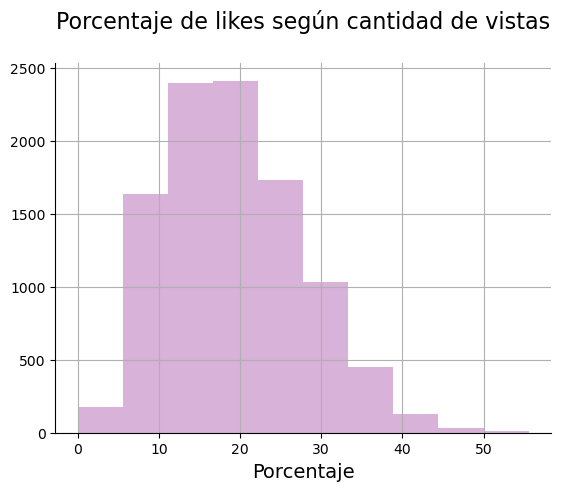

In [31]:
#Histogramas
#Porcentaje_likes
plt.figure()
plt.hist(df['Porcentaje_likes'].dropna(), bins=10, color="purple", alpha=0.3)
plt.ylabel("", size=14)
plt.xlabel("Porcentaje", size=14)
plt.title("Porcentaje de likes según cantidad de vistas", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()


*Frecuencia de categorías:* se analizaron las variables categóricas:  Director, Género y Pais. Se realizó la tabla de frecuencia.

In [12]:
#Tabla de frecuencia de variables categóricas
columnas = ['Genero', 'Director', 'Pais']

for col in columnas:
    if col in df.columns:
        # Convertir a string y limpiar
        limpiado = (
            df[col]
            .dropna()
            .astype(str)
            .str.replace(r'[\[\]\']', '', regex=True)  # eliminar corchetes y comillas
            .str.split(',')
        )
        df_exploded = limpiado.explode().str.strip().str.lower()

        # Mostrar top 10 valores
        print(f'\nTop 10 en columna: {col}')
        print(df_exploded.value_counts().head(10))




Top 10 en columna: Genero
Genero
drama              4416
comedy             2932
thriller           2312
action             2074
horror             1812
crime              1523
adventure          1449
romance            1373
science fiction    1265
fantasy             995
Name: count, dtype: int64

Top 10 en columna: Director
Director
chuck jones           55
cirio h. santiago     43
william witney        42
antonio margheriti    39
steven spielberg      31
robert stevenson      31
roy rowland           29
roger corman          28
sergio martino        27
sergio corbucci       27
Name: count, dtype: int64

Top 10 en columna: Pais
Pais
usa            7130
uk             1332
france          853
italy           615
germany         518
japan           433
canada          408
spain           225
australia       164
south korea     161
Name: count, dtype: int64


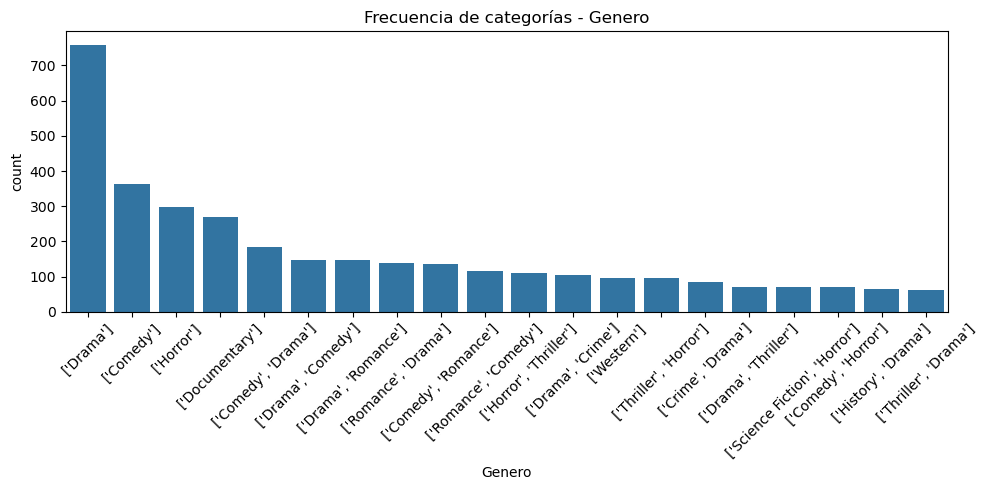

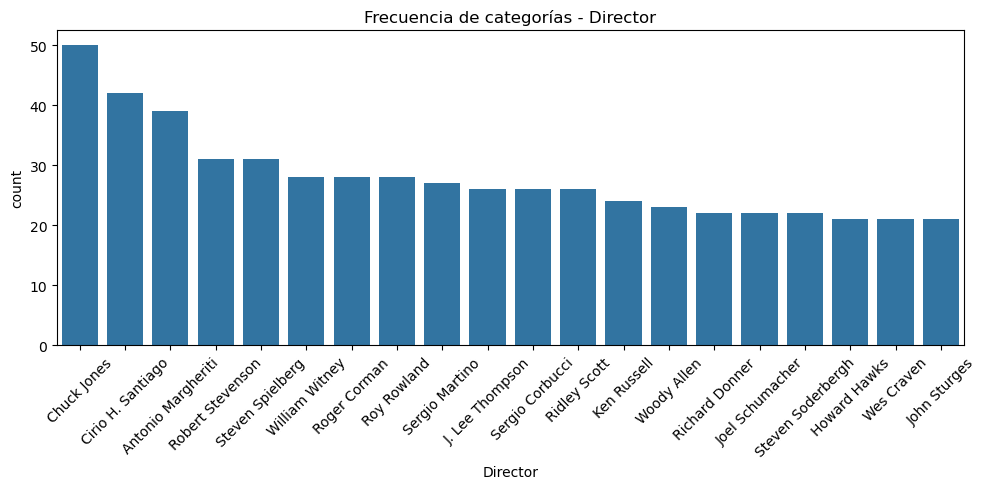

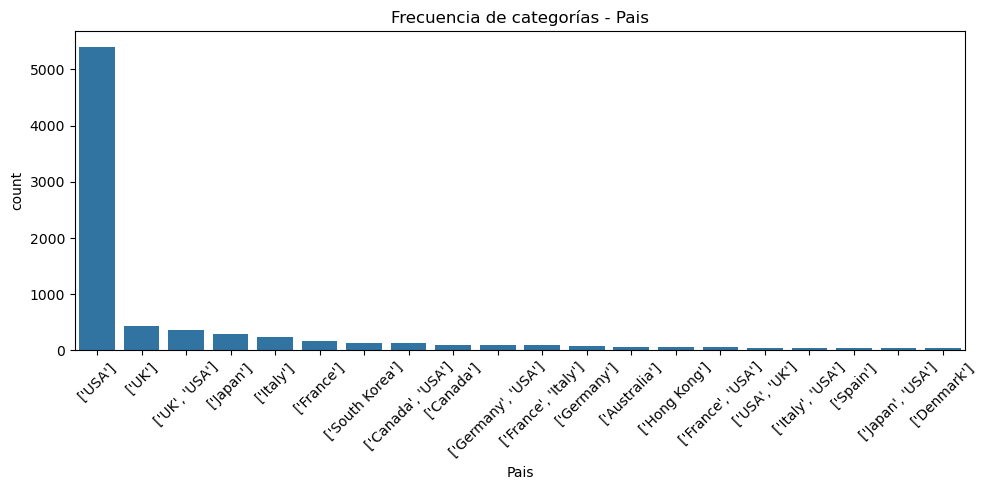

In [36]:
#Variables categóricas 
columnas_categoricas = ['Genero', 'Director', 'Pais']

#Gráfico de barras para c/u
for col in columnas_categoricas:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:20])  # limitar a 20 si hay muchas categorías
    plt.title(f'Frecuencia de categorías - {col}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


C:\Users\natie\AppData\Local\Temp\ipykernel_9648\1723521578.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_long, x='Estrellas', y='Cantidad', estimator=sum, palette='viridis')


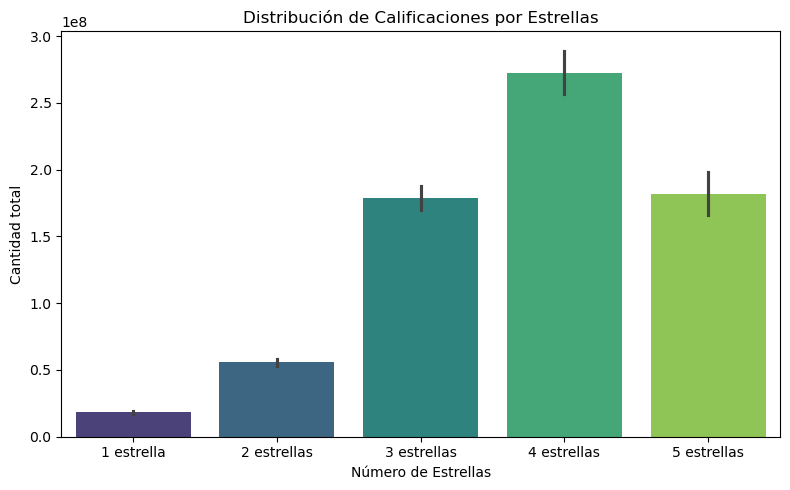

In [34]:
#Grafico de cantidad de estrellas

#Crear lista
cols_estrellas = ['★', '★½', '★★', '★★½', '★★★', '★★★½', '★★★★', '★★★★½', '★★★★★']

#Convertir a formato long y cambiar nombre de columnas
df_long = df.melt(value_vars=cols_estrellas,
                  var_name='Estrellas',
                  value_name='Cantidad')

df_long['Estrellas'] = df_long['Estrellas'].map({
    '★' or '½': '1 estrella',
    '★★' or '★½': '2 estrellas',
    '★★★' or '★★½': '3 estrellas',
    '★★★★' or '★★★½': '4 estrellas',
    '★★★★★' or '★★★★½': '5 estrellas'
})

# gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=df_long, x='Estrellas', y='Cantidad', estimator=sum, palette='viridis')
plt.title('Distribución de Calificaciones por Estrellas')
plt.xlabel('Número de Estrellas')
plt.ylabel('Cantidad total')

plt.tight_layout()
plt.show()

*Identificación de outlires:* se identificaron los outliers de las variables continuas a partir de Rango intercuartílico

In [13]:
#Identificación de outliers (rango intercuartilico)

# Seleccionar columnas numéricas
numericas = df.select_dtypes(include='number')

# Diccionario para almacenar los índices de los outliers por columna
outliers_dict = {}

for col in numericas.columns:
    Q1 = numericas[col].quantile(0.25)
    Q3 = numericas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detectar outliers
    outliers = numericas[(numericas[col] < lower_bound) | (numericas[col] > upper_bound)]
    outliers_dict[col] = outliers.index.tolist()

    # Mostrar resultados
    if outliers.empty:
        print(f'No se encontraron outliers en la columna "{col}".')
    else:
        print(f'Se encontraron {len(outliers)} outliers en la columna "{col}".')

Se encontraron 97 outliers en la columna "Calificación_promedio".
Se encontraron 741 outliers en la columna "Duración".
Se encontraron 1427 outliers en la columna "Vistas".
Se encontraron 1513 outliers en la columna "Likes".
Se encontraron 1558 outliers en la columna "½".
Se encontraron 1547 outliers en la columna "★".
Se encontraron 1439 outliers en la columna "★½".
Se encontraron 1464 outliers en la columna "★★".
Se encontraron 1381 outliers en la columna "★★½".
Se encontraron 1418 outliers en la columna "★★★".
Se encontraron 1449 outliers en la columna "★★★½".
Se encontraron 1522 outliers en la columna "★★★★".
Se encontraron 1645 outliers en la columna "★★★★½".
Se encontraron 1674 outliers en la columna "★★★★★".
Se encontraron 1418 outliers en la columna "Cantidad_calificaciones".
Se encontraron 71 outliers en la columna "Porcentaje_likes".
Se encontraron 276 outliers en la columna "estrellas".


**Objetivo específico 1:** analizar la aceptación de películas por género, director y país de origen según vistas y likes.

*Comparación de conjuntos de datos:* para cumplir con el objetivo específico 1 del se realizaron comparaciones entre conjunto de datos. Estas fueron Vistas y Likes en función del Género, Director y País de origen. 

C:\Users\natie\AppData\Local\Temp\ipykernel_9648\1525335309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Vistas', y='Genero', palette='Blues_d')


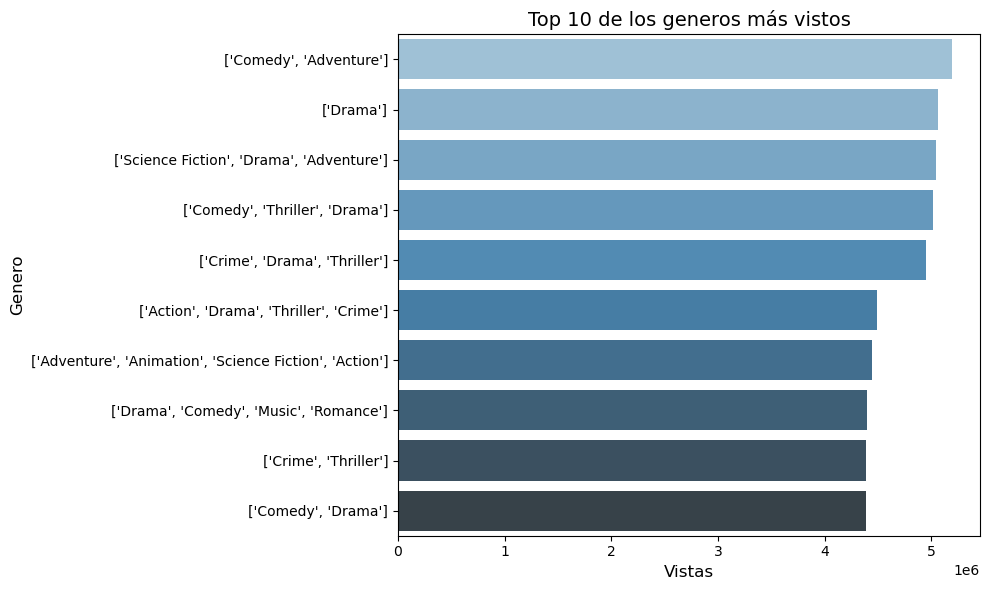

C:\Users\natie\AppData\Local\Temp\ipykernel_9648\1525335309.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Likes', y='Genero', palette='Blues_d')


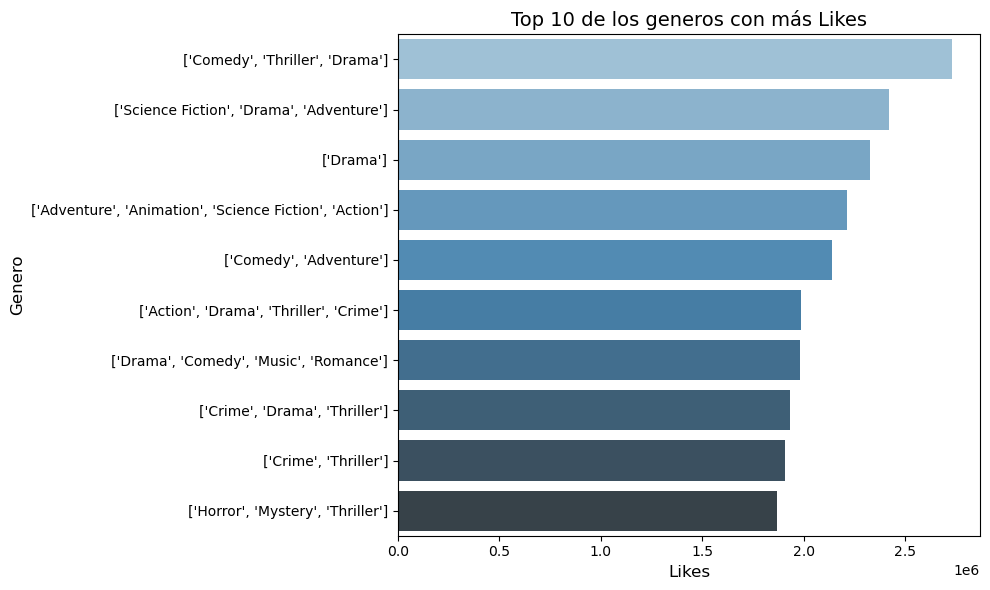

In [40]:
#Vistas y Likes en función del género
top_vistas = df[['Genero', 'Vistas']].sort_values(by='Vistas', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Vistas', y='Genero', palette='Blues_d')
plt.title('Top 10 de los generos más vistos', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Genero', fontsize=12)
plt.tight_layout()
plt.show()

top_vistas = df[['Genero', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Likes', y='Genero', palette='Blues_d')
plt.title('Top 10 de los generos con más Likes', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Genero', fontsize=12)
plt.tight_layout()
plt.show()


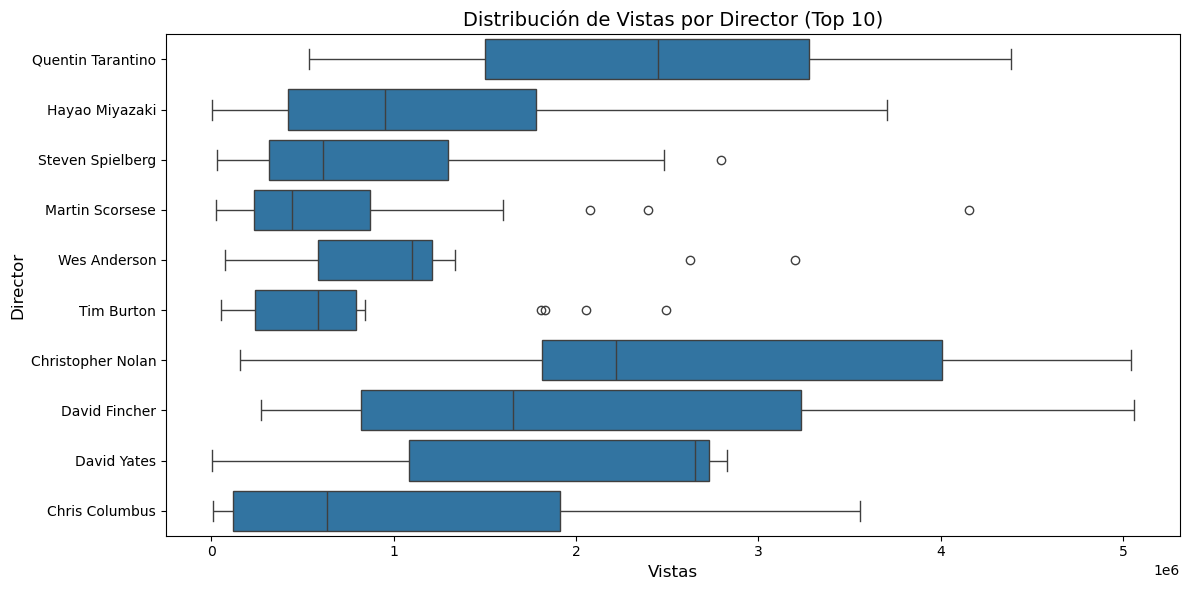

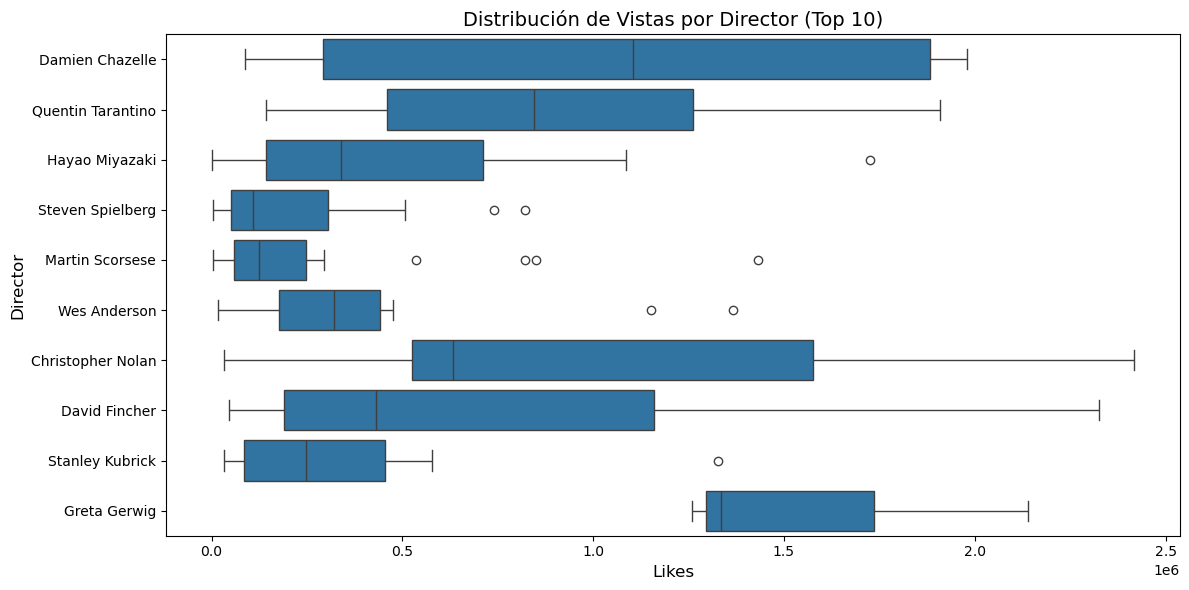

In [29]:
#Vistas y Likes en función del director

top_directores = df[df['Director'].isin(
    df.groupby('Director')['Vistas'].sum().sort_values(ascending=False).head(10).index)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top_directores, x='Vistas', y='Director')
plt.title('Distribución de Vistas por Director (Top 10)', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

top_directores = df[df['Director'].isin(
    df.groupby('Director')['Likes'].sum().sort_values(ascending=False).head(10).index)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top_directores, x='Likes', y='Director')
plt.title('Distribución de Likes por Director (Top 10)', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\natie\AppData\Local\Temp\ipykernel_9648\2154062089.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Vistas', y='Pais', palette='Blues_d')


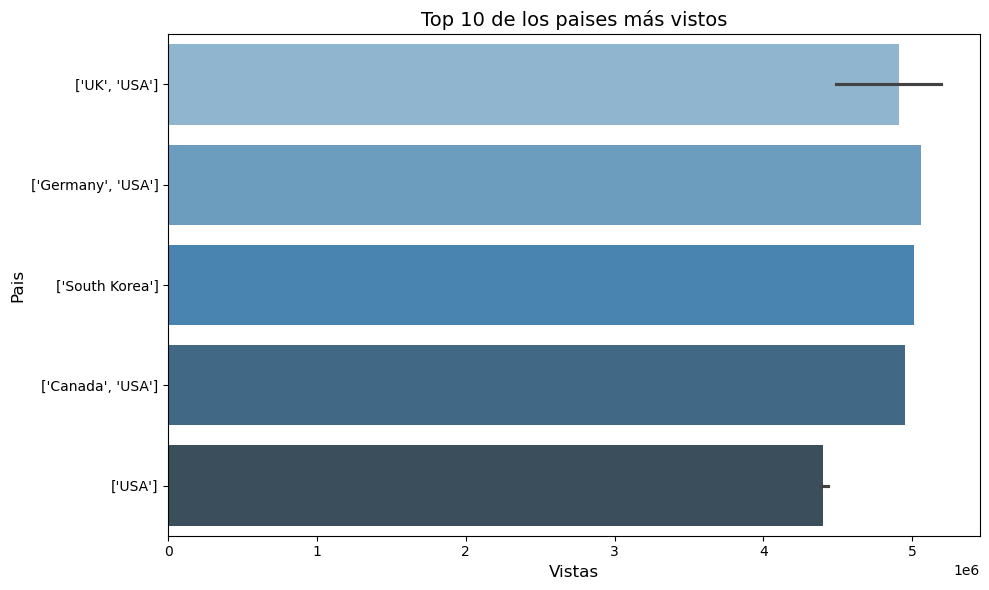

C:\Users\natie\AppData\Local\Temp\ipykernel_9648\2154062089.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_Likes, x='Likes', y='Pais', palette='Blues_d')


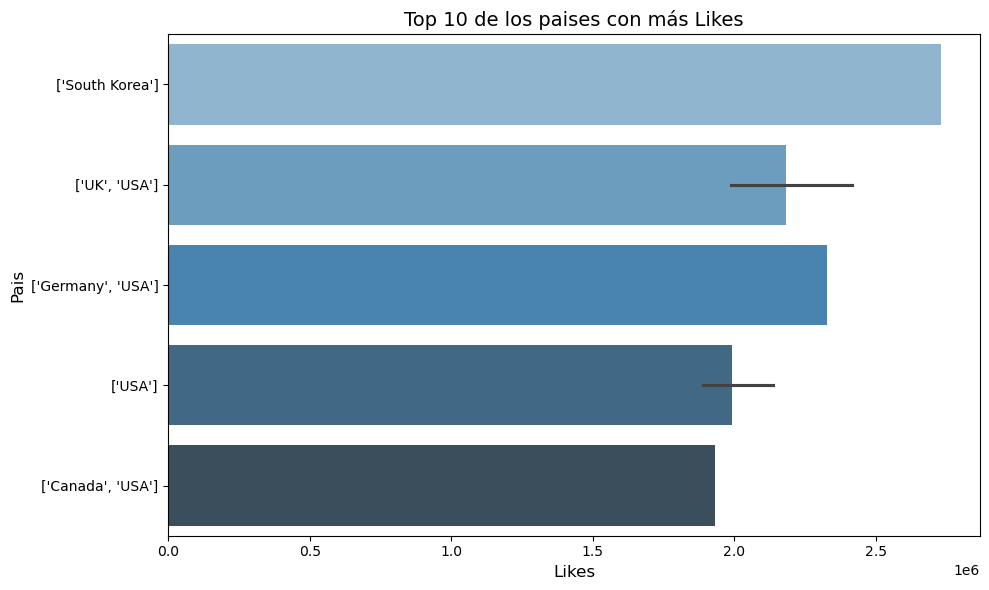

In [42]:
top_vistas = df[['Pais', 'Vistas']].sort_values(by='Vistas', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Vistas', y='Pais', palette='Blues_d')
plt.title('Top 10 de los paises más vistos', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.tight_layout()
plt.show()

top_Likes = df[['Pais', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_Likes, x='Likes', y='Pais', palette='Blues_d')
plt.title('Top 10 de los paises con más Likes', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.tight_layout()
plt.show()

**Objetivo específico 2:** determinar si existe relación, y cómo se comporta, entre la cantidad de vistas y la puntuación.

**Objetivo específico 3:** verificar si existe relación entre la cantidad de vistas de las películas y su duración 

*Evaluación de relaciones, Correlación:* para cumplir con el objetivo específico 2 y 3 se realizó el analisis de correlación numérico entre la cantidad de vistas y Likes, y entre la cantidad de vistas y su duración 

In [22]:
#Transformación de datos 
df[["Vistas" , "Likes"]] = df[["Vistas", "Likes"]].astype(float)

In [18]:
#Verificación de la transformación de datos
df.dtypes

Titulo                      object
Director                    object
Elenco                      object
Calificación_promedio      float64
Genero                      object
Duración                   float64
Pais                        object
Lenguaje                    object
Descripcion                 object
Productora                  object
Vistas                     float64
Likes                      float64
½                            int64
★                            int64
★½                           int64
★★                           int64
★★½                          int64
★★★                          int64
★★★½                         int64
★★★★                         int64
★★★★½                        int64
★★★★★                        int64
Cantidad_calificaciones      int64
Film_URL                    object
Porcentaje_likes           float64
Promedio_estrellas          object
estrellas                    int64
dtype: object

In [20]:
#Análisis de correlación de vistas y likes
correlation = df['Vistas'].corr(df["Likes"])
print(correlation)

0.9506660101541341


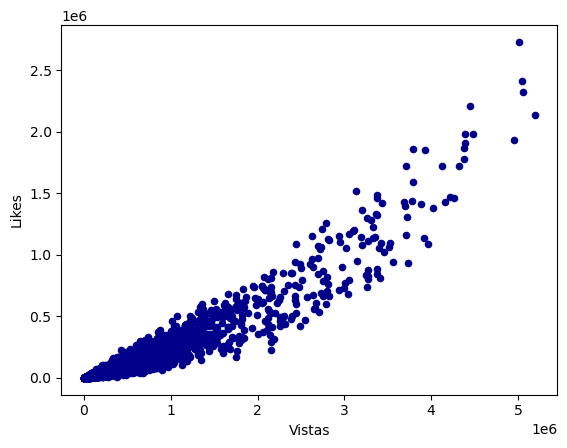

In [27]:
columns=(['Vistas', 'Likes'])
ax1 = df.plot.scatter(x='Vistas',
                      y='Likes',
                      c='DarkBlue')

In [24]:
#Análisis de correlación de vistas y duracion
correlation = df['Vistas'].corr(df["Duración"])
print(correlation)

0.145716254802972
